In [0]:
# %tensorflow_version 2.x
%tensorflow_version 1.x
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Data Augmentation
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [0]:
# import tensorflow
# print(tensorflow.__version__)

In [2]:
#2,000 images
!wget --no-check-certificate \
   https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O \
   /tmp/cats_and_dogs_filtered.zip

--2020-01-20 02:52:02--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.128, 2a00:1450:4013:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   231MB/s    in 0.3s    

2020-01-20 02:52:03 (231 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

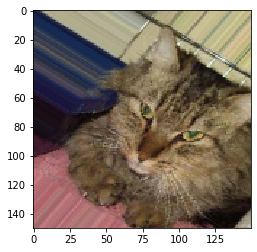

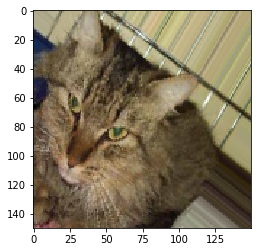

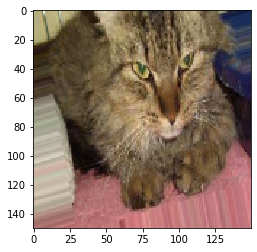

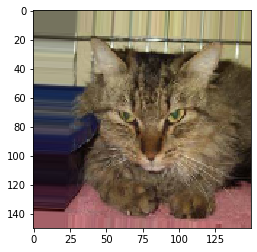

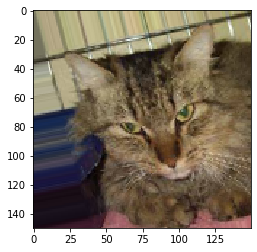

In [4]:
#apply the datagen transformations to a cat image from the training set to produce five random variants.
#Rerun the cell a few times to see fresh batches of random variants.

%matplotlib inline

import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img_path = os.path.join(train_cats_dir, train_cat_fnames[2])
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# The .flow() command below generates batches of randomly transformed images
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 5 == 0:
    break

In [5]:
#Add Data Augmentation to the Preprocessing Step

# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 32 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

In [0]:
def model1():
  # Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
  # the three color channels: R, G, and B
  img_input = layers.Input(shape=(150, 150, 3))

  # First convolution extracts 16 filters that are 3x3
  # Convolution is followed by max-pooling layer with a 2x2 window
  x = layers.Conv2D(16, 3, activation='relu')(img_input)
  x = layers.MaxPooling2D(2)(x)

  # Second convolution extracts 32 filters that are 3x3
  # Convolution is followed by max-pooling layer with a 2x2 window
  x = layers.Conv2D(32, 3, activation='relu')(x)
  x = layers.MaxPooling2D(2)(x)

  # Third convolution extracts 64 filters that are 3x3
  # Convolution is followed by max-pooling layer with a 2x2 window
  x = layers.Convolution2D(64, 3, activation='relu')(x)
  x = layers.MaxPooling2D(2)(x)

  # Flatten feature map to a 1-dim tensor
  x = layers.Flatten()(x)

  # Create a fully connected layer with ReLU activation and 512 hidden units
  x = layers.Dense(512, activation='relu')(x)

  #add some dropout, right before the final classification layer
  # Add a dropout rate of 0.5
  x = layers.Dropout(0.5)(x)

  # Create output layer with a single node and sigmoid activation
  output = layers.Dense(1, activation='sigmoid')(x)

  # Configure and compile the model
  model = Model(img_input, output)
  model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])
  model.summary()
  return model

In [0]:
def model2():
  # Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
  # the three color channels: R, G, and B
  img_input = layers.Input(shape=(150, 150, 3))

  # First convolution extracts 16 filters that are 3x3
  # Convolution is followed by max-pooling layer with a 2x2 window
  x = layers.Conv2D(16, 3, activation='relu')(img_input)
  x = layers.MaxPooling2D(2)(x)

  # Second convolution extracts 32 filters that are 3x3
  # Convolution is followed by max-pooling layer with a 2x2 window
  x = layers.Conv2D(32, 3, activation='relu')(x)
  x = layers.MaxPooling2D(2)(x)

  # Third convolution extracts 64 filters that are 3x3
  # Convolution is followed by max-pooling layer with a 2x2 window
  x = layers.Convolution2D(64, 3, activation='relu')(x)
  x = layers.MaxPooling2D(2)(x)

  # Flatten feature map to a 1-dim tensor
  x = layers.Flatten()(x)

  # Create a fully connected layer with ReLU activation and 512 hidden units
  x = layers.Dense(512, activation='relu')(x)

  #add some dropout, right before the final classification layer
  # Add a dropout rate of 0.5
  # x = layers.Dropout(0.5)(x)

  # Create output layer with a single node and sigmoid activation
  output = layers.Dense(1, activation='sigmoid')(x)

  # Configure and compile the model
  model = Model(img_input, output)
  model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])
  model.summary()
  return model

In [9]:
#With data augmentation and dropout in place, let's retrain our convnet model.
#This time, let's train on all 2,000 images available, for 30 epochs, and validate on all 1,000 validation images
#2,000 training images are randomly transformed each time a new training epoch runs
mdl1 = model1()
history1 = mdl1.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D) 

In [10]:
mdl2 = model2()
history2 = mdl2.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0   

In [0]:
def plotHist(hist):
  #Let's evaluate the results of model training with data augmentation and dropout
  # Retrieve a list of accuracy results on training and validation data
  # sets for each training epoch
  acc = hist.history['acc']
  val_acc = hist.history['val_acc']

  # Retrieve a list of list results on training and validation data
  # sets for each training epoch
  loss = hist.history['loss']
  val_loss = hist.history['val_loss']

  print('len acc ', len(acc))
  # Get number of epochs
  epochs = range(len(acc))

  # Plot training and validation accuracy per epoch
  plt.plot(epochs, acc)
  plt.plot(epochs, val_acc)
  plt.title('Training and validation accuracy')

  plt.figure()

  # Plot training and validation loss per epoch
  plt.plot(epochs, loss)
  plt.plot(epochs, val_loss)
  plt.title('Training and validation loss')

len acc  30


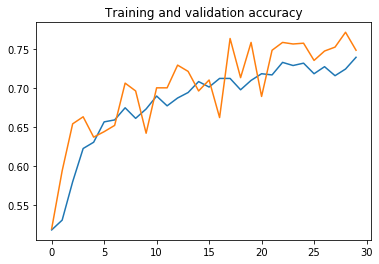

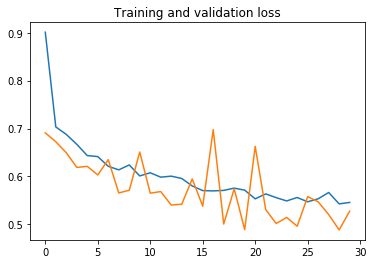

In [12]:
plotHist(history1)

len acc  30


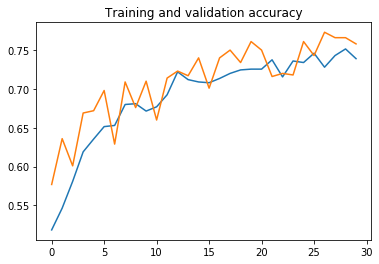

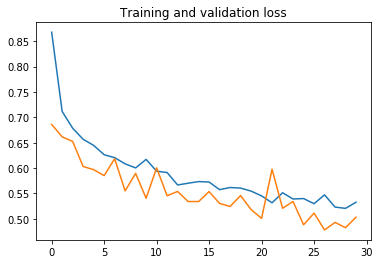

In [13]:
plotHist(history2)

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [15]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# from keras.models import load_model

Using TensorFlow backend.


In [0]:
import numpy as np

# load and prepare the image
def load_image(img):
  # load the image
  # img = load_img(filename, target_size=(150, 150))
	# convert to array
  img = img_to_array(img)
 
  # # reshape into a single sample with 3 channels
  # img = img.reshape(1, 150, 150, 3)
  # # center pixel data
  # img = img.astype('float32')
  # img = img - [123.68, 116.779, 103.939]

  img = img/255
  img = np.expand_dims(img, axis=0)
  return img

In [0]:
def predRes(pred, img):
  if(pred[:,:]>0.5):
    value ='Dog :%1.2f'%(pred[0,0])
    plt.text(50, 144, value, color='blue', fontsize=18, bbox=dict(facecolor='white',alpha=0.8))
  else:
    value ='Cat :%1.2f'%(1.0-pred[0,0])
    plt.text(50, 144, value, color='blue', fontsize=18, bbox=dict(facecolor='white',alpha=0.8))

  plt.imshow(img)
  plt.show()

In [0]:
ifn1 = '/content/drive/My Drive/ailab/topic/cat3.jpg'
img1 = load_img(ifn1, target_size=(150, 150))
# load the image
limg = load_image(img1)

In [25]:
# pred1 = mdl1.predict(limg, batch_size=None,steps=1) #gives all class prob.

In [0]:
pred1 = mdl1.predict(limg, batch_size=None) #gives all class prob.

In [72]:
pred1

array([[0.4810402]], dtype=float32)

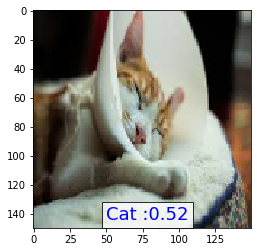

In [73]:
predRes(pred1, img1)

[[0.87869483]]


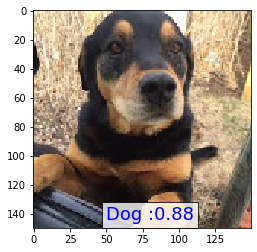

In [75]:
ifn1 = '/content/drive/My Drive/ailab/topic/dog7.jpg'
img1 = load_img(ifn1, target_size=(150, 150))
limg = load_image(img1)
pred1 = mdl1.predict(limg, batch_size=None) #gives all class prob.
print(pred1)
predRes(pred1, img1)

In [64]:
pred1[0,0]

0.21646027